In [1]:
import numpy as np
import pandas as pd 
import datetime
from tqdm import tqdm
import pandas_datareader.naver as web_naver
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
start = '2007-09-01'
end = '2021-12-31'

In [4]:
dividend=pd.read_csv('dividend.csv',index_col=0,parse_dates=True)
dps=pd.read_csv('dps.csv',index_col=0,parse_dates=True)

In [6]:
price_quarter=pd.read_csv('price_panel_quarter.csv',index_col=0,parse_dates=True)

months=[]
for i in dps.index:
    months.append(str(i)[:7])
months = list(set(months))
months_quarter=[]
for i in months:
    
    if (i[-2:]=='12') or (i[-2:]=='03') or (i[-2:]=='06') or (i[-2:]=='09'):
        months_quarter.append(i)
quarter=[]
for month in months_quarter:
    quarter.append(str(dps.loc[month].index[-1])[:10])
quarter.sort()



dps.fillna(method='ffill',inplace=True)
dps_quarter=dps.loc[quarter]

In [42]:
dividend.fillna(method='ffill',inplace=True)
dividend_quarter=dividend.loc[quarter]

In [7]:
def portfolio_construction(price,dps,start,end):
    #dps
    dps_unbiased=pd.DataFrame(columns=dps.columns,index=dps.index)
    for i in range(len(dps)-8):
        if i%4==2:
            dps_unbiased.iloc[i+8]=dps.iloc[i]
        else:
            dps_unbiased.iloc[i+4]=dps.iloc[i]
    dps_unbiased=dps_unbiased.iloc[4:].copy()
    dps_unbiased=dps_unbiased[:-3].copy()
    dps_unbiased.fillna(method='ffill',inplace=True)

    rtn=np.log(price/price.shift(1))*100
    rtn=rtn.iloc[1:].copy()
    date_return_tickers=dict()

    rtn=rtn.reindex(dps_unbiased.index)
    rtn=rtn.iloc[2:]

    for i in range(len(rtn.index)):
        tickers=dps_unbiased.iloc[i].dropna().rank(method='first',ascending=False)\
            [(dps_unbiased.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
                (dps_unbiased.iloc[i].dropna().rank(method='first',ascending=False)>=start)].index.values

        tickers=list(tickers)
        date_return_tickers[rtn.index[i]]=\
            [[np.dot(rtn.iloc[i].reindex(tickers).fillna(-99).values,np.array([1/len(tickers) for i in range(len(tickers))]))],tickers]
        
    return date_return_tickers

    

In [18]:
high_dps=portfolio_construction(price=price_quarter,dps=dps_quarter,start=50,end=350)

In [19]:
low_dps=portfolio_construction(price=price_quarter,dps=dps_quarter,start=450,end=750)

In [20]:
print('high_dividend')
for i in range(1,len(high_dps.keys())):
    print(list(high_dps.keys())[i])
    sub=len([x for x in high_dps[list(high_dps.keys())[i]][1] if x not in high_dps[list(high_dps.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( high_dps[list(high_dps.keys())[i-1]][1])}')
    print('편입',[x for x in high_dps[list(high_dps.keys())[i]][1] if x not in high_dps[list(high_dps.keys())[i-1]][1]])
    print('퇴출',[x for x in high_dps[list(high_dps.keys())[i-1]][1] if x not in high_dps[list(high_dps.keys())[i]][1]])



high_dividend
2009-06-30 00:00:00
교체비율: 0.01
편입 ['093230', '044450', '051600']
퇴출 ['001375', '004565', '001080']
2009-09-30 00:00:00
교체비율: 0.0
편입 []
퇴출 []
2009-12-30 00:00:00
교체비율: 0.16333333333333333
편입 ['079430', '000725', '009240', '016385', '005560', '002900', '001370', '001375', '017940', '034220', '001530', '049770', '004565', '003495', '001770', '002220', '000180', '086280', '058650', '001880', '032640', '011810', '003490', '011790', '004137', '047050', '003530', '008260', '003000', '010140', '069260', '007800', '013365', '008560', '073240', '067250', '000810', '002797', '000890', '011160', '029780', '005820', '093050', '005190', '018670', '003850', '005800', '008870', '042660']
퇴출 ['006840', '000215', '051910', '018470', '053000', '003480', '000480', '004710', '089470', '005500', '000070', '003075', '006650', '044380', '006405', '012400', '000910', '005360', '032390', '051905', '016880', '003640', '025850', '002320', '012805', '015110', '005880', '002355', '000210', '044450', '

In [21]:
print('low_dividend')
for i in range(1,len(low_dps.keys())):
    print(list(low_dps.keys())[i])
    sub=len([x for x in low_dps[list(low_dps.keys())[i]][1] if x not in low_dps[list(low_dps.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( low_dps[list(low_dps.keys())[i-1]][1])}')
    print('편입',[x for x in low_dps[list(low_dps.keys())[i]][1] if x not in low_dps[list(low_dps.keys())[i-1]][1]])
    print('퇴출',[x for x in low_dps[list(low_dps.keys())[i-1]][1] if x not in low_dps[list(low_dps.keys())[i]][1]])

low_dividend
2009-06-30 00:00:00
교체비율: 0.02666666666666667
편입 ['005560', '003475', '020560', '006890', '003495', '094280', '003547', '001080']
퇴출 ['025560', '002785', '011300', '012405', '011330', '003965', '020120', '004920']
2009-09-30 00:00:00
교체비율: 0.0
편입 []
퇴출 []
2009-12-30 00:00:00
교체비율: 0.18
편입 ['092200', '100250', '018470', '004550', '003480', '011280', '001045', '089470', '005500', '051630', '044380', '006405', '012400', '000910', '032390', '101990', '003640', '004367', '012805', '003220', '015110', '002355', '100220', '051310', '091090', '012280', '004700', '071955', '019300', '002350', '000390', '004310', '069460', '003160', '009270', '004080', '012090', '021050', '003070', '023960', '001570', '010640', '009275', '004140', '032560', '011500', '011090', '000430', '001975', '067830', '012800', '093370', '013240', '068290']
퇴출 ['072130', '000725', '001140', '009440', '005560', '003475', '034220', '084695', '020560', '006890', '003495', '001687', '009070', '033240', '086280', '0

In [22]:
kospi=web_naver.NaverDailyReader(symbols='KOSPI', start=start,end=end,adjust_price=True)
kospi=kospi.read()
kospi=kospi.astype(float)

In [23]:
portfolio=pd.DataFrame(index=high_dps.keys())
portfolio['high_dps']=pd.Series(np.array([rtn[0] for rtn in list(high_dps.values())]).flatten(),index=high_dps.keys())
portfolio['low_dps']=pd.Series(np.array([rtn[0] for rtn in list(low_dps.values())]).flatten(),index=low_dps.keys())

In [24]:
kospi=kospi.loc[portfolio.index,:]['Close']
portfolio['KOSPI']=np.log(kospi/kospi.shift(1))*100



In [25]:
print("mean","\n",portfolio.mean())
print("")
print("std","\n",portfolio.std())
print("")
print("skewness","\n",portfolio.skew())
print("")
print("kurtosis","\n",portfolio.kurtosis())
print("")
print("sharpe ratio","\n", portfolio.mean() / portfolio.std())

mean 
 high_dps    -6.081500
low_dps    -12.117819
KOSPI        1.940321
dtype: float64

std 
 high_dps     9.760019
low_dps     10.621719
KOSPI        8.211058
dtype: float64

skewness 
 high_dps   -0.632393
low_dps     0.158262
KOSPI      -0.317174
dtype: float64

kurtosis 
 high_dps    1.811332
low_dps     1.260536
KOSPI       1.616552
dtype: float64

sharpe ratio 
 high_dps   -0.623103
low_dps    -1.140853
KOSPI       0.236306
dtype: float64


<AxesSubplot:>

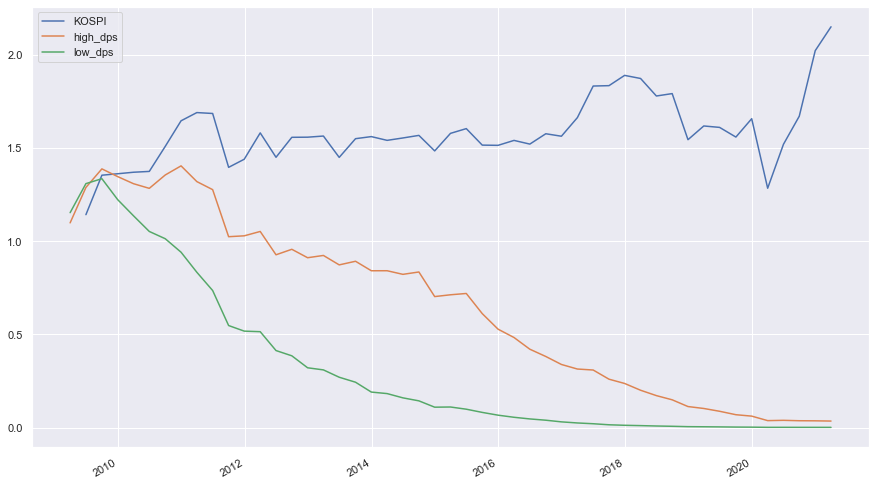

In [26]:
cum_rtn=portfolio[['KOSPI','high_dps','low_dps']]/100
(1+cum_rtn).cumprod().plot(figsize=(15,9))

In [27]:
def portfolio_construction1(price,dps,start,end):
    #dps
    dps=dps.iloc[4:]
    rtn=np.log(price/price.shift(1))*100
    rtn=rtn.iloc[1:].copy()
    date_return_tickers=dict()

    rtn=rtn.reindex(dps.index)
    rtn=rtn.iloc[2:]

    for i in range(len(rtn.index)):
        tickers=dps.iloc[i].dropna().rank(method='first',ascending=False)\
            [(dps.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
                (dps.iloc[i].dropna().rank(method='first',ascending=False)>=start)].index.values

        tickers=list(tickers)
        date_return_tickers[rtn.index[i]]=\
            [[np.dot(rtn.iloc[i].reindex(tickers).fillna(-99).values,np.array([1/len(tickers) for i in range(len(tickers))]))],tickers]
        
    return date_return_tickers

In [32]:
high_dps1=portfolio_construction1(price=price_quarter,dps=dps_quarter,start=0,end=300)
low_dps1=portfolio_construction1(price=price_quarter,dps=dps_quarter,start=500,end=800)

In [33]:
print('high_dps1')
for i in range(1,len(high_dps1.keys())):
    print(list(high_dps1.keys())[i])
    sub=len([x for x in high_dps1[list(high_dps1.keys())[i]][1] if x not in high_dps1[list(high_dps1.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( high_dps1[list(high_dps1.keys())[i-1]][1])}')
    print('편입',[x for x in high_dps1[list(high_dps1.keys())[i]][1] if x not in high_dps1[list(high_dps1.keys())[i-1]][1]])
    print('퇴출',[x for x in high_dps1[list(high_dps1.keys())[i-1]][1] if x not in high_dps1[list(high_dps1.keys())[i]][1]])



high_dps1
2009-06-30 00:00:00
교체비율: 0.016722408026755852
편입 ['028670', '005190', '005725', '009830', '014285']
퇴출 ['025610', '016560', '008560', '019680', '019685']
2009-09-30 00:00:00
교체비율: 0.0033444816053511705
편입 ['011810']
퇴출 ['084010']
2009-12-30 00:00:00
교체비율: 0.1705685618729097
편입 ['005720', '000725', '018880', '097959', '002025', '009240', '006060', '001067', '000225', '000490', '003480', '001065', '006110', '001045', '096770', '000070', '001770', '001500', '006405', '007980', '097955', '000860', '097950', '005950', '001060', '084010', '000157', '093230', '005610', '002320', '071970', '100220', '013365', '011070', '004135', '013367', '001049', '000075', '078000', '000720', '001250', '036570', '095720', '002027', '000155', '025860', '002240', '001040', '096775', '024100', '000150']
퇴출 ['024110', '000365', '000215', '011170', '035000', '015230', '001375', '010780', '006740', '001420', '003495', '005980', '006650', '015760', '000950', '001880', '004250', '011810', '003490', '00036

In [34]:
print('low_dps1')
for i in range(1,len(low_dps1.keys())):
    print(list(low_dps1.keys())[i])
    sub=len([x for x in low_dps1[list(low_dps1.keys())[i]][1] if x not in low_dps1[list(low_dps1.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( low_dps1[list(low_dps1.keys())[i-1]][1])}')
    print('편입',[x for x in low_dps1[list(low_dps1.keys())[i]][1] if x not in low_dps1[list(low_dps1.keys())[i-1]][1]])
    print('퇴출',[x for x in low_dps1[list(low_dps1.keys())[i-1]][1] if x not in low_dps1[list(low_dps1.keys())[i]][1]])

low_dps1
2009-06-30 00:00:00
교체비율: 0.01
편입 ['008560', '026940', '010050']
퇴출 ['003220', '001080', '028670']
2009-09-30 00:00:00
교체비율: 0.013333333333333334
편입 ['109070', '108070', '107590', '002210']
퇴출 ['001820', '004545', '027740', '005110']
2009-12-30 00:00:00
교체비율: 0.2
편입 ['024110', '001685', '013570', '033660', '005750', '001140', '014350', '009380', '001020', '004550', '010780', '053000', '020560', '002535', '004565', '003495', '001687', '001680', '005500', '002220', '000180', '006650', '015760', '001689', '009190', '000950', '001880', '004250', '014825', '005360', '012095', '003490', '047050', '000800', '004100', '016880', '008260', '002310', '034120', '004200', '014820', '051310', '073240', '004555', '011390', '004545', '027740', '014300', '002530', '005110', '018410', '004255', '003419', '004149', '017180', '002710', '004147', '006660', '023810', '004010']
퇴출 ['063160', '097959', '002025', '033270', '009160', '003480', '097230', '001045', '096770', '001740', '008600', '006405',

In [35]:
portfolio=pd.DataFrame(index=high_dps.keys())
portfolio['high_dps']=pd.Series(np.array([rtn[0] for rtn in list(high_dps1.values())]).flatten(),index=high_dps1.keys())
portfolio['low_dps']=pd.Series(np.array([rtn[0] for rtn in list(low_dps1.values())]).flatten(),index=low_dps1.keys())

In [38]:
portfolio['KOSPI']=np.log(kospi/kospi.shift(1))*100

In [39]:
print("mean","\n",portfolio.mean())
print("")
print("std","\n",portfolio.std())
print("")
print("skewness","\n",portfolio.skew())
print("")
print("kurtosis","\n",portfolio.kurtosis())
print("")
print("sharpe ratio","\n", portfolio.mean() / portfolio.std())

mean 
 high_dps    -5.194326
low_dps    -13.943101
KOSPI        1.940321
dtype: float64

std 
 high_dps     9.083769
low_dps     10.919287
KOSPI        8.211058
dtype: float64

skewness 
 high_dps   -0.808697
low_dps     0.250034
KOSPI      -0.317174
dtype: float64

kurtosis 
 high_dps    2.321954
low_dps     1.331328
KOSPI       1.616552
dtype: float64

sharpe ratio 
 high_dps   -0.571825
low_dps    -1.276924
KOSPI       0.236306
dtype: float64


<AxesSubplot:>

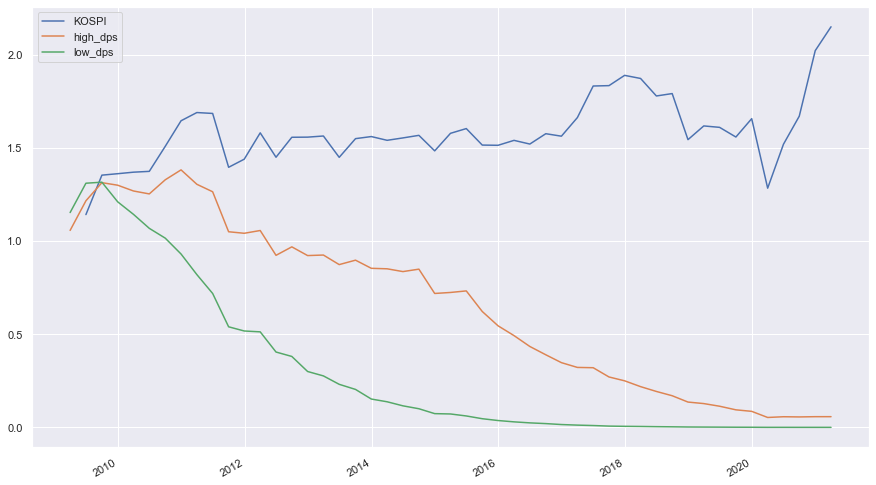

In [40]:
cum_rtn=portfolio[['KOSPI','high_dps','low_dps']]/100
(1+cum_rtn).cumprod().plot(figsize=(15,9))

주식의 가치평가 모델에 따르면 고배당일 수록 그리고 배당성향이 낮을 수록 주식의 성장률이 좋다. 고배당/배당성향을 팩터로 정해보자



In [41]:
def portfolio_con(start,end,price,dividend,dps):
    dividend_unbiased=pd.DataFrame(columns=dividend.columns,index=dividend.index)
    for i in range(len(dividend)-8):
        if i%4==2:
            dividend_unbiased.iloc[i+8]=dividend.iloc[i]
        else:
            dividend_unbiased.iloc[i+4]=dividend.iloc[i]
    dividend_unbiased=dividend_unbiased.iloc[4:].copy()
    dividend_unbiased=dividend_unbiased[:-3].copy()
    dividend_unbiased.fillna(method='ffill',inplace=True)

    dps_unbiased=pd.DataFrame(columns=dps.columns,index=dps.index)
    for i in range(len(dps)-8):
        if i%4==2:
            dps_unbiased.iloc[i+8]=dps.iloc[i]
        else:
            dps_unbiased.iloc[i+4]=dps.iloc[i]
    dps_unbiased=dps_unbiased.iloc[4:].copy()
    dps_unbiased=dps_unbiased[:-3].copy()
    dps_unbiased.fillna(method='ffill',inplace=True)


    rtn=np.log(price/price.shift(1))*100
    rtn=rtn.iloc[1:].copy()
    date_return_tickers=dict()

    factor=dividend_unbiased.copy()/dps_unbiased.copy()
    rtn=rtn.reindex(factor.index)
    rtn=rtn.iloc[2:]
    date_return_tickers=dict()

    for i in range(len(rtn.index)):
        tickers=dps_unbiased.iloc[i].dropna().rank(method='first',ascending=False)\
            [(dps_unbiased.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
                (dps_unbiased.iloc[i].dropna().rank(method='first',ascending=False)>=start)].index.values


        tickers=list(tickers)
        date_return_tickers[rtn.index[i]]=\
            [[np.dot(rtn.iloc[i].reindex(tickers).fillna(-99).values,np.array([1/len(tickers) for i in range(len(tickers))]))],tickers]
        
    return date_return_tickers









    

In [44]:
high_factor=portfolio_con(price=price_quarter,dps=dps_quarter,dividend=dividend_quarter,start=0,end=300)

In [45]:
low_factor=portfolio_con(price=price_quarter,dps=dps_quarter,dividend=dividend_quarter,start=500,end=800)

In [46]:
print('high_factor')
for i in range(1,len(high_factor.keys())):
    print(list(high_factor.keys())[i])
    sub=len([x for x in high_factor[list(high_factor.keys())[i]][1] if x not in high_factor[list(high_factor.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( high_factor[list(high_factor.keys())[i-1]][1])}')
    print('편입',[x for x in high_factor[list(high_factor.keys())[i]][1] if x not in high_factor[list(high_factor.keys())[i-1]][1]])
    print('퇴출',[x for x in high_factor[list(high_factor.keys())[i-1]][1] if x not in high_factor[list(high_factor.keys())[i]][1]])



high_factor
2009-06-30 00:00:00
교체비율: 0.010033444816053512
편입 ['093230', '044450', '051600']
퇴출 ['016590', '018470', '008730']
2009-09-30 00:00:00
교체비율: 0.0
편입 []
퇴출 []
2009-12-30 00:00:00
교체비율: 0.12709030100334448
편입 ['010145', '016590', '005560', '008730', '016580', '012610', '015230', '001375', '034220', '003495', '006800', '086280', '009200', '012450', '034020', '001880', '011810', '003490', '006370', '002460', '005440', '021240', '010140', '069260', '002797', '000890', '029780', '001310', '093050', '005190', '000830', '005725', '009830', '014285', '000835', '003850', '009835', '042660']
퇴출 ['001067', '053000', '001065', '004710', '001045', '005500', '024900', '000070', '003075', '044380', '006405', '012400', '000910', '001060', '032390', '093230', '003640', '002320', '015110', '002355', '044450', '002350', '009680', '005810', '009270', '006400', '000075', '021050', '003070', '001120', '006390', '010640', '009275', '001047', '011500', '000430', '001040', '068290']
2010-03-31 00:00:

In [47]:
print('low_factor')
for i in range(1,len(low_factor.keys())):
    print(list(low_factor.keys())[i])
    sub=len([x for x in low_factor[list(low_factor.keys())[i]][1] if x not in low_factor[list(low_factor.keys())[i-1]][1]])
    print(f'교체비율: {sub/len( low_factor[list(low_factor.keys())[i-1]][1])}')
    print('편입',[x for x in low_factor[list(low_factor.keys())[i]][1] if x not in low_factor[list(low_factor.keys())[i-1]][1]])
    print('퇴출',[x for x in low_factor[list(low_factor.keys())[i-1]][1] if x not in low_factor[list(low_factor.keys())[i]][1]])

low_factor
2009-06-30 00:00:00
교체비율: 0.03
편입 ['005560', '014827', '090350', '001630', '033920', '094280', '003547', '001080', '051310']
퇴출 ['003160', '004149', '013367', '001049', '000425', '004720', '000680', '004415', '004820']
2009-09-30 00:00:00
교체비율: 0.0
편입 []
퇴출 []
2009-12-30 00:00:00
교체비율: 0.17666666666666667
편입 ['092200', '100250', '018470', '003480', '011280', '001045', '089470', '051630', '044380', '006405', '012400', '000910', '084870', '032390', '101990', '003640', '004367', '012805', '003220', '015110', '102260', '024890', '002355', '100220', '101140', '101060', '006345', '002760', '019300', '002350', '003160', '009270', '004080', '012090', '021050', '044820', '001970', '023960', '001570', '010640', '009275', '004140', '032560', '011500', '011090', '000430', '001975', '067830', '012800', '004380', '093370', '013240', '068290']
퇴출 ['001685', '000725', '001140', '005560', '007860', '014827', '090350', '034220', '001687', '001680', '001689', '001630', '033920', '001880', '032

In [50]:
portfolio=pd.DataFrame(index=high_factor.keys())
portfolio['high_factor']=pd.Series(np.array([rtn[0] for rtn in list(high_factor.values())]).flatten(),index=high_factor.keys())
portfolio['low_factor']=pd.Series(np.array([rtn[0] for rtn in list(low_factor.values())]).flatten(),index=low_factor.keys())

In [51]:
portfolio['KOSPI']=np.log(kospi/kospi.shift(1))*100


In [52]:
print("mean","\n",portfolio.mean())
print("")
print("std","\n",portfolio.std())
print("")
print("skewness","\n",portfolio.skew())
print("")
print("kurtosis","\n",portfolio.kurtosis())
print("")
print("sharpe ratio","\n", portfolio.mean() / portfolio.std())

mean 
 high_factor    -5.581440
low_factor    -14.927966
KOSPI           1.940321
dtype: float64

std 
 high_factor     9.246555
low_factor     10.864351
KOSPI           8.211058
dtype: float64

skewness 
 high_factor   -0.823869
low_factor     0.157440
KOSPI         -0.317174
dtype: float64

kurtosis 
 high_factor    2.169720
low_factor     1.069203
KOSPI          1.616552
dtype: float64

sharpe ratio 
 high_factor   -0.603624
low_factor    -1.374032
KOSPI          0.236306
dtype: float64


<AxesSubplot:>

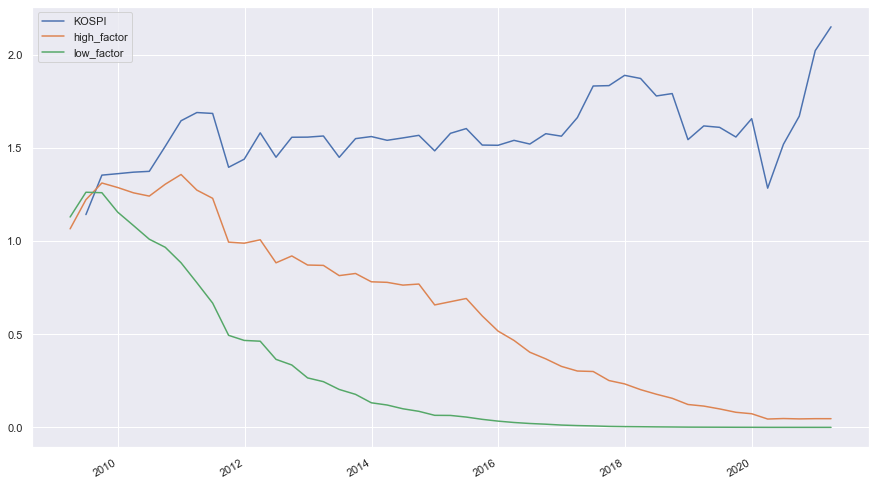

In [53]:
cum_rtn=portfolio[['KOSPI','high_factor','low_factor']]/100
(1+cum_rtn).cumprod().plot(figsize=(15,9))